In [1]:
# 数据提取
import pandas as pd
# Id  job   jobtag  salary  edu  exp  cpmpany  pubdate address  benefits  comtype  finance  comsize 

In [1]:
import pandas as pd
df_employ=pd.read_csv('data/employ_job.csv',sep="^",names=['id','job','jobtag','salary','edu','exp','company','pubdate','address','benefits','comtype','finance','comsize'])


In [2]:
# 查看数据
df_employ.shape

(102643, 13)

In [7]:
#查看各列的数据类型 
df_employ.dtypes


id          object
job         object
jobtag      object
salary      object
edu         object
exp         object
company     object
pubdate     object
address     object
benefits    object
comtype     object
finance     object
comsize     object
dtype: object

In [8]:
df_employ.values

array([['\ufeff1', 'JAVA高级研发工程师—阿拉丁科技', 'Java,Android,IOS', ..., '金融',
        '不需要融资', '150-500人'],
       ['2', '高级Java工程师', '后端,Java,服务器端', ..., '移动互联网,金融', 'B轮', '150-500人'],
       ['3', 'Java开发工程师', 'Java', ..., '社交', 'B轮', '150-500人'],
       ..., 
       ['102090', '游戏策划', '游戏', ..., '教育,游戏', '不需要融资', '少于15人'],
       ['102091', '游戏策划', '专项奖金,五险一金,通讯津贴,交通补助', ..., '游戏,文娱丨内容', '上市公司',
        '500-2000人'],
       ['102092', '游戏策划', '带薪年假,定期体检,弹性工作,年度旅游', ..., '游戏', '不需要融资',
        '50-150人']], dtype=object)

In [9]:
df_employ.index

RangeIndex(start=0, stop=102643, step=1)

In [10]:
df_employ.sample(5)

,id,job,jobtag,salary,edu,exp,company,pubdate,address,benefits,comtype,finance,comsize
23466,23430,架构师（SAAS系统）,"汽车,技术管理,系统架构,架构师",50k-70k,大专,经验10年以上,易车公司,2019-08-15,北京·西直门,发展空间大,"移动互联网,电商",上市公司,2000人以上
42799,42679,场景原画主管,"游戏,原画",8k-15k,本科,经验3-5年,冰果数码,2019-08-19,成都·武侯区,"周末双休,工龄工资,全勤奖,五险",游戏,未融资,50-150人
93250,92754,游戏策划,"游戏,移动互联网,文案,系统",4k-8k,大专,经验1-3年,启乐科技-随时开启快乐,2019-08-23,成都·高新区,"期权奖励,六险一金,节假日福利,交通补助","移动互联网,游戏",天使轮,50-150人
60212,59978,PECO独立设计招聘市场营销经理,"新零售,数据分析,市场,营销,市场推广",8k-10k,本科,经验1-3年,PECO独立设计师品牌,2019-08-19,深圳·南山区,"年终分红,股权激励,健身俱乐部,带薪休假","移动互联网,电商",不需要融资,15-50人
65928,65692,广告投放,"广告营销,媒体,品牌管理,广告执行,广告协调,广告活动",8k-12k,本科,经验1-3年,Helens,2019-08-23,武汉·光谷,包吃包住、别墅办公、无需融资、行业第一,"消费生活,文娱丨内容",不需要融资,2000人以上


In [2]:
# 数据清洗(数据预处理)
# 1、去除重复数据
df_employ.drop_duplicates(inplace=True)
# 2、删除空值
df_employ.dropna(inplace=True)
# 3、提取工资中没有"以上"的数据
df_employ=df_employ[df_employ.salary.str.contains('以上')==False]
# 4、将工资中的k替换为000
df_employ=df_employ.apply(lambda x:x.str.replace("k","000") if x.name=="salary" else x)
df_employ=df_employ.apply(lambda x:x.str.replace("K","000") if x.name=="salary" else x)
# df_employ.salary = df_employ.salary.str.replace('k','000')
# 5、将工资拆分为两个字段，最高salary_h和最低salary_l
df_employ["salary_l"]=df_employ.salary.str.split("-").str[0]
df_employ["salary_h"]=df_employ.salary.str.split("-").str[1]
df_employ
# 6、将发布时间拆分为year month day
df_employ[["year","month","day"]]=df_employ.pubdate.str.split("-",expand=True)
df_employ
# 7、将地址拆分为 city area
df_employ[["city","area"]]=df_employ.address.str.split("·",expand=True)
df_employ
# 8、将id设置为索引行
df_employ.index=df_employ.id
df_employ


,id,job,jobtag,salary,edu,exp,company,pubdate,address,benefits,comtype,finance,comsize,salary_l,salary_h,year,month,day,city,area
id,,,,,,,,,,,,,,,,,,,,
﻿1,﻿1,JAVA高级研发工程师—阿拉丁科技,"Java,Android,IOS",20000-40000,本科,经验3-5年,阿拉丁控股集团有限公司,2019-08-21,北京·大望路,五险一金，周末双休,金融,不需要融资,150-500人,20000,40000,2019,08,21,北京,大望路
2,2,高级Java工程师,"后端,Java,服务器端",25000-35000,本科,经验3-5年,小帮规划,2019-08-16,北京·望京,牛人多，氛围好，福利好,"移动互联网,金融",B轮,150-500人,25000,35000,2019,08,16,北京,望京
3,3,Java开发工程师,Java,20000-40000,本科,经验3-5年,玩吧,2019-08-20,北京·东城区,"七险一金,弹性不打卡,免费午餐,季度旅游",社交,B轮,150-500人,20000,40000,2019,08,20,北京,东城区
4,4,java开发工程师,"支付,Java",18000-30000,本科,经验5-10年,汇付,2019-08-21,上海·虹梅路,"团队好,绩效奖金,环境好,氛围好","移动互联网,金融",上市公司,500-2000人,18000,30000,2019,08,21,上海,虹梅路
5,5,高级Java开发工程师,"大数据,智能硬件,平台,MySQL,Java,后端",20000-35000,本科,经验3-5年,涂鸦智能,2019-08-21,杭州·西溪,福利好、定期团建、环境氛围好,"移动互联网,硬件",C轮,500-2000人,20000,35000,2019,08,21,杭州,西溪
6,6,Java开发工程师,"电商,广告营销,服务器端,后端,分布式,Java",20000-40000,本科,经验3-5年,Lazada,2019-08-13,深圳·深圳湾,东南亚再造淘宝，股票+新加坡工作差旅,"移动互联网,电商",不需要融资,2000人以上,20000,40000,2019,08,13,深圳,深圳湾
7,7,Java软件工程师,"电商,后端",20000-35000,大专,经验3-5年,毒APP,2019-08-20,上海·凉城,五险一金 免费晚餐,"移动互联网,电商",B轮,500-2000人,20000,35000,2019,08,20,上海,凉城
8,8,Java研发工程师（财务方向）,"ERP,Java",30000-40000,本科,经验5-10年,贝壳,2019-08-21,北京·酒仙桥,"15薪,免费三餐,大平台,健身房",房产家居,D轮及以上,2000人以上,30000,40000,2019,08,21,北京,酒仙桥
9,9,Java工程师,"后端,Java",15000-30000,本科,经验1-3年,洋钱罐,2019-08-21,北京·朝阳区,十四薪；六险一金；午餐晚餐；,"移动互联网,金融",不需要融资,150-500人,15000,30000,2019,08,21,北京,朝阳区


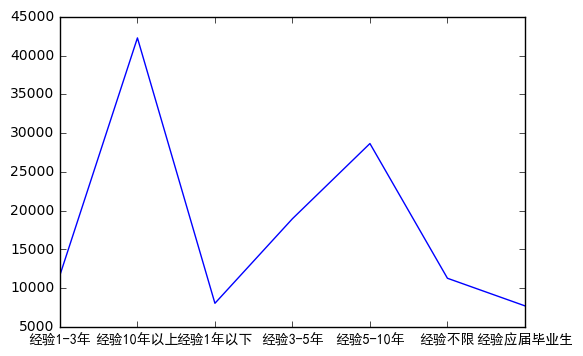

In [3]:
# 数据统计分析
# 1、统计所有职位的平均最高工资和平均最低工资
df_employ.salary_l=df_employ.salary_l.astype("int")
df_employ.salary_h=df_employ.salary_h.astype("int")
df_employ.salary_l.mean()
df_employ.salary_h.mean()
# 2、查询出最高工资大于30000的职位
df_employ[df_employ.salary_h>30000].job
# 3、查询上海工资最低小于10000的职位
df_employ[(df_employ.city=="上海") & (df_employ.salary_l<10000)].job
# 4、查询B轮 C轮 D轮的公司名称、职位、工资、融资情况
df_employ[df_employ.finance.isin(["B轮","C轮","D轮"])][["company","jobtag","salary","finance"]]
# df_employ[(df_employ.finance=="B轮")|(df_employ.finance=="C轮")|(df_employ.finance=="D轮")][["company","jobtag","salary","finance"]]
# 5、数据集中有多少家公司
# df_employ.drop_duplicates("company").company.count()
df_employ['company'].nunique()
# 6、需求最大的岗位是什么
df_employ.job.value_counts().head(1)
# 7、每个学历的平均薪资
df_employ["salary_m"]=(df_employ.salary_h+df_employ.salary_l)/2
df_employ.groupby('edu').salary_m.mean()
# 8、每个工作经验级别的平均薪资
import matplotlib.pyplot as plt
df=pd.DataFrame(df_employ.groupby("exp").salary_m.mean())
plt.plot(range(7),df.iloc[:,0])
plt.xticks(range(7),df.index,fontproperties="SimHei")
plt.show()
# df_employ.groupby("exp").salary_m.mean()
# # 9、每个城市的平均工资
# df_employ.groupby("city").salary_m.mean()
# # 10、招聘职位个数大于10个的公司
# df_employ.company.value_counts()>10

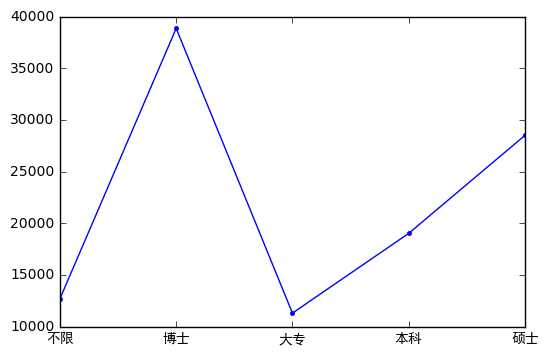

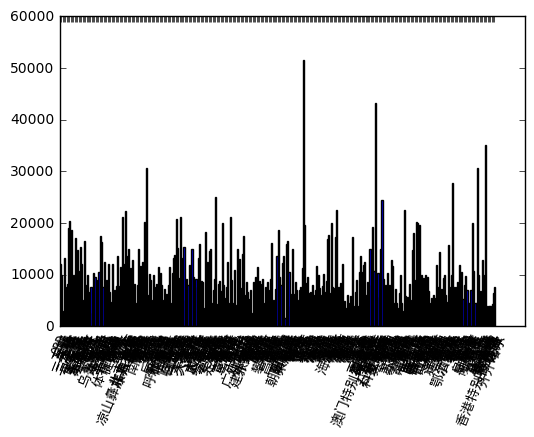

company
(千人计划)科技服务中心    False
01LIV零壹家居       False
1000E           False
100教育           False
100课堂           False
111,Inc.         True
123buy          False
12缸             False
168物流           False
1758微游戏          True
17Career        False
18              False
1905电影网         False
1919            False
1919酒类直供         True
1nuts           False
2144游戏           True
21世纪中住地产        False
233digi         False
233网校           False
2345.com         True
23魔方            False
24好玩            False
2D传媒            False
316服务平台         False
32号             False
3456玩            True
350游戏           False
35互联            False
360              True
                ...  
龙旗              False
龙晟科技            False
龙杯              False
龙海互娱            False
龙渊网络             True
龙湖集团             True
龙湾科技            False
龙猫数据            False
龙玩互娱             True
龙环汇丰咨询          False
龙石互娱             True
龙禧智业            False
龙科              False
龙粤环保机械设备有限公司    False
龙腾

In [34]:
# 7、每个学历的平均薪资
df=pd.DataFrame(df_employ.groupby('edu').salary_m.mean())
plt.plot(range(5),df.salary_m,marker='.',)
plt.xticks(range(5),df.index,fontproperties="SimHei")
plt.show()
# 9、每个城市的平均工资
df=pd.DataFrame(df_employ.groupby("city").salary_m.mean())
x_len=len(df.salary_m)
plt.bar(range(x_len),df.salary_m)
plt.xticks(range(x_len),df.index,fontproperties="SimHei",size='small',rotation=68)
plt.show()


In [35]:
# 10、招聘职位个数大于10个的公司
df_employ.groupby('company').apply(lambda x:x['job'].value_counts().sum()>10)

company
(千人计划)科技服务中心    False
01LIV零壹家居       False
1000E           False
100教育           False
100课堂           False
111,Inc.         True
123buy          False
12缸             False
168物流           False
1758微游戏          True
17Career        False
18              False
1905电影网         False
1919            False
1919酒类直供         True
1nuts           False
2144游戏           True
21世纪中住地产        False
233digi         False
233网校           False
2345.com         True
23魔方            False
24好玩            False
2D传媒            False
316服务平台         False
32号             False
3456玩            True
350游戏           False
35互联            False
360              True
                ...  
龙旗              False
龙晟科技            False
龙杯              False
龙海互娱            False
龙渊网络             True
龙湖集团             True
龙湾科技            False
龙猫数据            False
龙玩互娱             True
龙环汇丰咨询          False
龙石互娱             True
龙禧智业            False
龙科              False
龙粤环保机械设备有限公司    False
龙腾